In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import time
import cv2

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from data_manager import *
from metadata import *

import matplotlib.pyplot as plt
%matplotlib inline

from multiprocess import Pool

from cell_utilities import *

Setting environment for Gordon


No vtk


In [8]:
dataset_name = 'largest30p_sizeNormalized'

In [9]:
EMBEDDING_DIR = os.path.join(CELLS_ROOTDIR, 'embedding', dataset_name)

In [10]:
embeddings = bp.unpack_ndarray_file(os.path.join(EMBEDDING_DIR, 'embeddings_%(dataset_name)s_nystromSample100.bp' % 
                                                 dict(dataset_name=dataset_name)))

# K-Means over embedding (Spectral clustering)

In [ ]:
n_class = 8

In [ ]:
# KMeans to embedding features - equiv. to spectral clustering

kmeanspp_seeds = bp.unpack_ndarray_file(os.path.join(EMBEDDING_DIR, '%(dataset_name)s_kmeansppCenters.bp' % \
                    {'dataset_name': dataset_name}))

kmeanspp_closest_seed = bp.unpack_ndarray_file(os.path.join(EMBEDDING_DIR, '%(dataset_name)s_closestKmeansppCenters.bp' % \
                    {'dataset_name': dataset_name}))

t = time.time()
class_label, centroids = kmeans(embeddings, seed_indices=kmeanspp_seeds[:n_class])
sys.stderr.write('%d seconds' % (time.time() - t))

In [64]:
bp.pack_ndarray_file(class_label, os.path.join(EMBEDDING_DIR, '%(dataset_name)s_kmeansClassLabel.bp' % \
                                               {'dataset_name': dataset_name}))

In [63]:
# print 'After kmeans,', len(np.where(class_label == kmeanspp_closest_seed)[0])/float(len(class_label)), \
# 'samples belong to the same centroid as at kmeans++ initialization.'

After kmeans, 0.00898578478309 samples belong to the same centroid as at kmeans++ initialization.


# Load spectral clustering result

In [11]:
class_label = bp.unpack_ndarray_file(os.path.join(EMBEDDING_DIR, '%(dataset_name)s_kmeansClassLabel.bp' % \
                                               {'dataset_name': dataset_name}))

n_class = len(np.unique(class_label))
print '%d classes' % n_class

8 classes


# Find group average and group medoid

In [12]:
embedding_centroids = np.array([embeddings[class_label == cls].mean(axis=0) for cls in range(n_class)])

In [13]:
# (medoids = the sample closest to centroid in terms of Euclidean distance in embedding space)

group_repr_indices = np.zeros((n_class,), np.int)

for cls in range(n_class):
    dists = parallel_cdist([embedding_centroids[cls]], embeddings[class_label == cls])[0]
    idx = dists.argmin()
    in_group_indices = np.where(class_label == cls)[0]
    group_repr_idx = in_group_indices[idx]
    group_repr_indices[cls] = group_repr_idx

In [14]:
dataset_cells_aligned_mirrored_padded = bp.unpack_ndarray_file(os.path.join(EMBEDDING_DIR, dataset_name + '_cellsAlignedPadded.bp'))

In [15]:
average_masks = [dataset_cells_aligned_mirrored_padded[class_label == cls].mean(axis=0) for cls in range(n_class)]

In [16]:
prototypes = dataset_cells_aligned_mirrored_padded[group_repr_indices]

In [ ]:
# n_selected_cells = len(selected_cell_indices)
# print n_selected_cells, 'selected cells'

In [ ]:
# # Load blob masks

# selected_cell_indices = bp.unpack_ndarray_file(os.path.join(PROCESSED_CELLS_DIR, \
#                                         '%(dataset_name)s_indices.bp' % {'dataset_name': dataset_name}))
# n_selected_cells = len(selected_cell_indices)
# print n_selected_cells, 'selected cells'

In [16]:
# cells_aligned_padded = bp.unpack_ndarray_file(PROCESSED_CELLS_DIR + '/cells_aligned_padded.bp')
# selected_cells_aligned_padded = cells_aligned_padded[selected_cell_indices].copy()
# del cells_aligned_padded

In [17]:
# cells_h_aligned_padded = bp.unpack_ndarray_file(PROCESSED_CELLS_DIR + '/cells_h_aligned_padded.bp')
# selected_cells_h_aligned_padded = cells_h_aligned_padded[selected_cell_indices].copy()
# del cells_h_aligned_padded

In [18]:
# cells_v_aligned_padded = bp.unpack_ndarray_file(PROCESSED_CELLS_DIR + '/cells_v_aligned_padded.bp')
# selected_cells_v_aligned_padded = cells_v_aligned_padded[selected_cell_indices].copy()
# del cells_v_aligned_padded

In [19]:
# cells_d_aligned_padded = bp.unpack_ndarray_file(PROCESSED_CELLS_DIR + '/cells_d_aligned_padded.bp')
# selected_cells_d_aligned_padded = cells_d_aligned_padded[selected_cell_indices].copy()
# del cells_d_aligned_padded

In [20]:
# Compute group centroid masks

# average_masks = [selected_cells_aligned_padded[class_label == cls].mean(axis=0) for cls in range(n_class)]

In [27]:
# # Flatten the masks

# selected_cell_arrays = selected_cells_aligned_padded.reshape((n_selected_cells, -1))
# selected_cell_arrays_h = selected_cells_h_aligned_padded.reshape((n_selected_cells, -1))
# selected_cell_arrays_v = selected_cells_v_aligned_padded.reshape((n_selected_cells, -1))
# selected_cell_arrays_d = selected_cells_d_aligned_padded.reshape((n_selected_cells, -1))

# selected_cell_sizes = selected_cell_arrays.sum(axis=1)

In [28]:
# # Get the templates

# templates = selected_cells_aligned_padded[group_repr_indices]
# templates_h = selected_cells_h_aligned_padded[group_repr_indices]
# templates_v = selected_cells_v_aligned_padded[group_repr_indices]
# templates_d = selected_cells_d_aligned_padded[group_repr_indices]
# templates_flattened = selected_cell_arrays[group_repr_indices]
# templates_flattened_h = selected_cell_arrays_h[group_repr_indices]
# templates_flattened_v = selected_cell_arrays_v[group_repr_indices]
# templates_flattened_d = selected_cell_arrays_d[group_repr_indices]

In [29]:
# # Compute in-group affinities

# recon_jacs = np.zeros((n_selected_cells,))
# recon_bestmir = np.zeros((n_selected_cells,), np.int)
# recon_jacs_perclass = [None for _ in range(n_class)]

# for cls in range(n_class):
    
#     in_group_index_selectors = class_label == cls
    
#     arrays = selected_cell_arrays[in_group_index_selectors]
#     sizes = selected_cell_sizes[in_group_index_selectors]
    
#     templ_size = np.count_nonzero(templates_flattened[cls])
    
#     jacs_o = compute_jaccard_x_vs_list_v2(arrays, templates_flattened[cls], sizes, templ_size)
#     jacs_h = compute_jaccard_x_vs_list_v2(arrays, templates_flattened_h[cls], sizes, templ_size)
#     jacs_v = compute_jaccard_x_vs_list_v2(arrays, templates_flattened_v[cls], sizes, templ_size)
#     jacs_d = compute_jaccard_x_vs_list_v2(arrays, templates_flattened_d[cls], sizes, templ_size)
#     jacs_stacked = np.c_[jacs_o, jacs_h, jacs_v, jacs_d]
    
#     jacs_max = np.max(jacs_stacked, axis=1)
#     jacs_amax = np.argmax(jacs_stacked, axis=1)
    
#     recon_jacs[in_group_index_selectors] = jacs_max
#     recon_bestmir[in_group_index_selectors] = jacs_amax
    
#     recon_jacs_perclass[cls] = jacs_max

In [ ]:
# # Jaccard affinities within group

# fig, axes = plt.subplots(nrows=20, ncols=5, sharex=True, sharey=True, figsize=(20,20))
# axes = axes.flatten()
# for cls, jacs in enumerate(recon_jacs_perclass):
#     axes[cls].hist(jacs, bins=np.linspace(0,1,100));
#     axes[cls].set_title('Class %d' % cls);
# #     axes[cls].set_xlabel('Jaccard index');
# #     axes[cls].set_ylabel('Number of blobs');
# plt.xlabel('jaccard index');
# plt.tight_layout()
# plt.show()

In [ ]:
# # Compute average Jaccard affinities

# print 'Average jaccard index against reconstruction: %.2f' % recon_jacs.mean()
# for i, jacs in enumerate(recon_jacs_perclass):
#     print 'Class %d: %.2f\t %d blobs' % (i, jacs.mean(), len(jacs))

In [ ]:
# # Best mirror versions

# hist, edges = np.histogram(recon_bestmir, bins=[0,1,2,3,4]);
# print dict(zip(['orig', 'horiz', 'vert', 'diag'], hist))

# Display

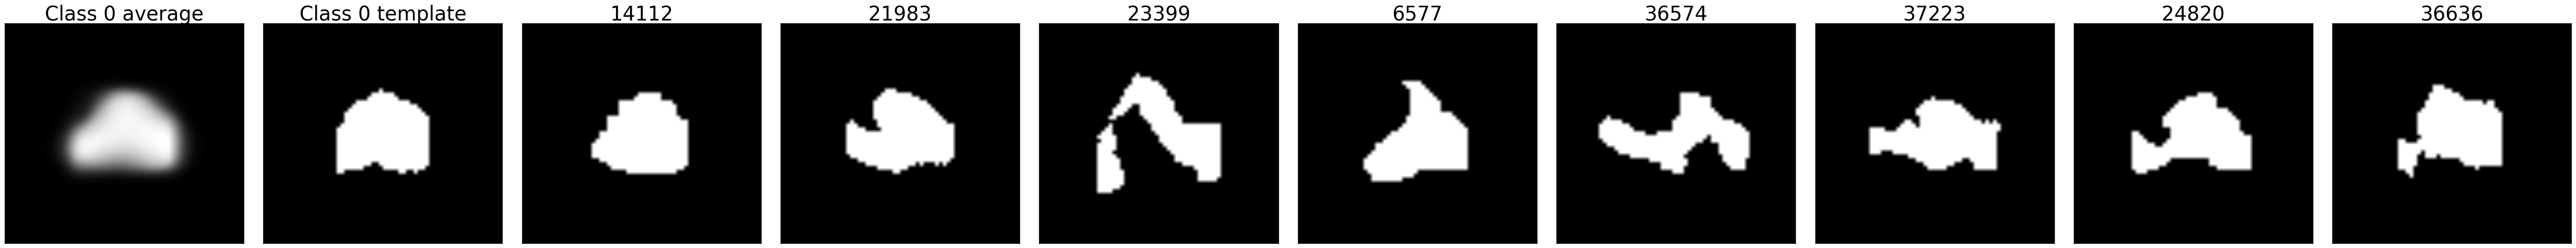

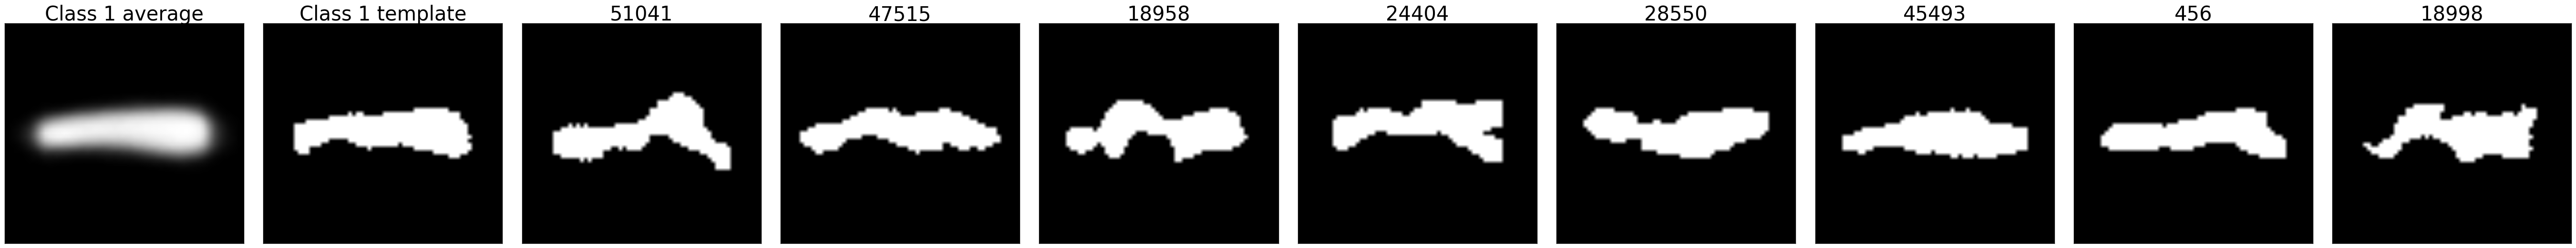

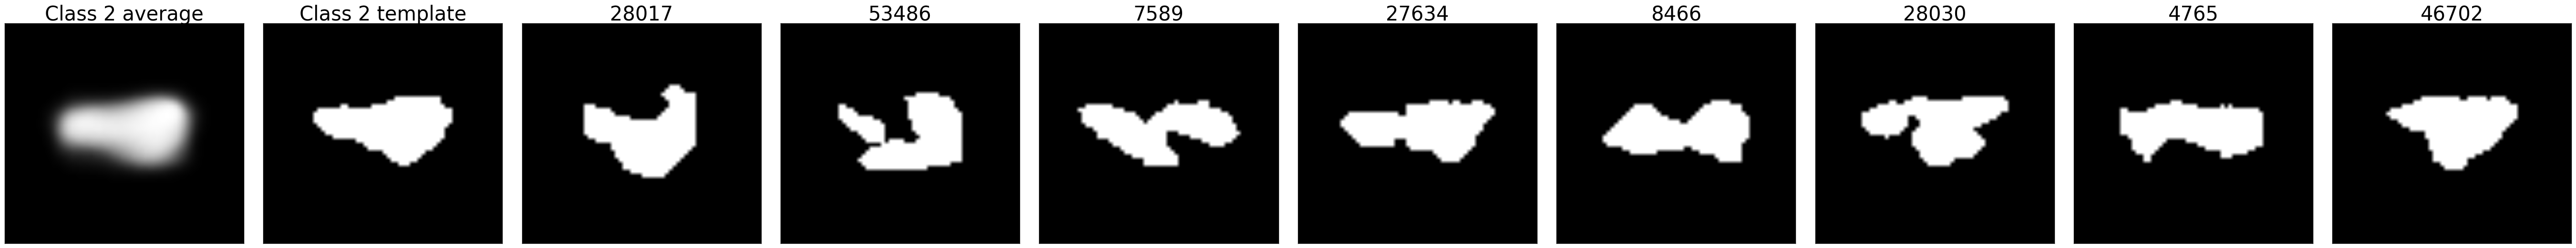

In [72]:
for cls in range(n_class)[:3]:
    
    indices = np.where(class_label == cls)[0]
    sample_indices = np.random.choice(indices, min(len(indices), 8), replace=False)            

    sample_cell_masks = [dataset_cells_aligned_mirrored_padded[i] for i in sample_indices]
            
    titles = ['Class %d average' % cls, 'Class %d template' % cls] + [str(i) for i in sample_indices]
        
    display_images_in_grids([average_masks[cls], prototypes[cls]] + sample_cell_masks, 
                            nc=10, titles=titles)

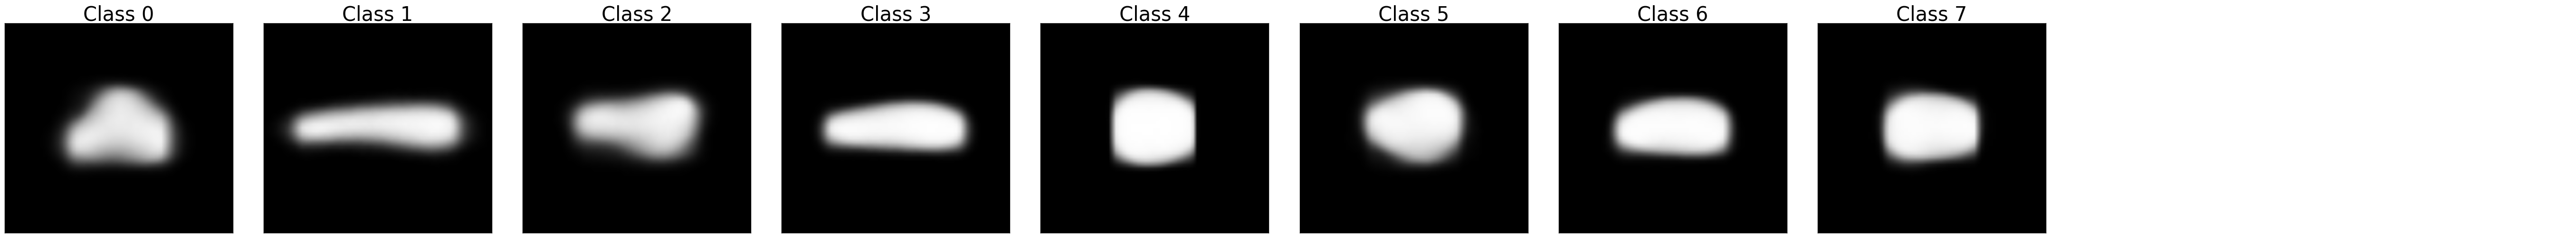

In [73]:
# Display average masks for each cluster

display_images_in_grids(average_masks, nc=10, vmin=0, vmax=1, cmap=plt.cm.gray,
                        titles=['Class %d' % cls for cls in range(n_class)])

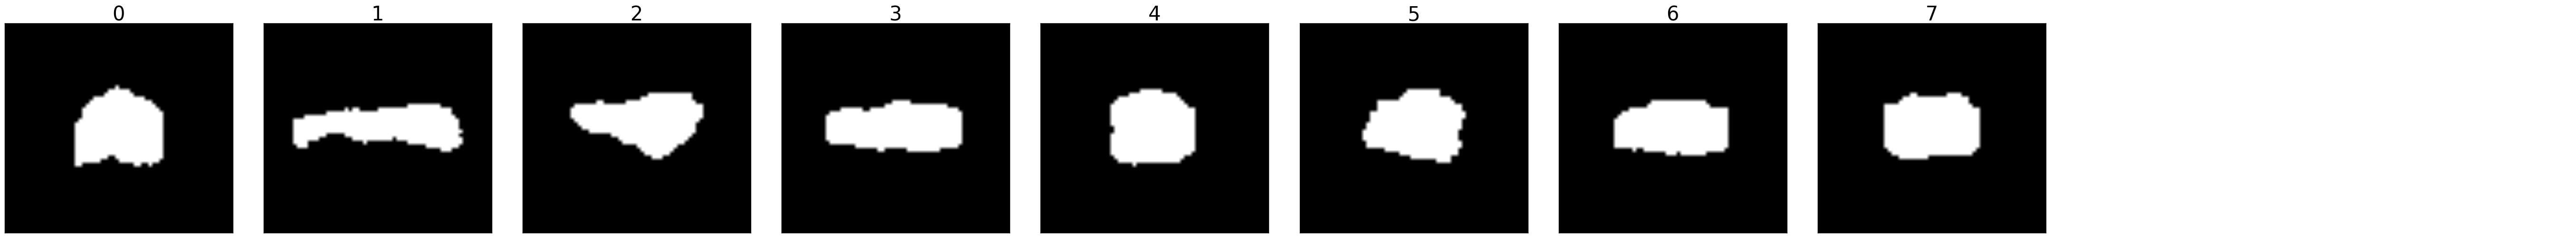

In [74]:
# Display template masks of each cluster

display_images_in_grids(prototypes, nc=10, titles=[str(cls) for cls in range(n_class)],
                       vmin=0, vmax=1, cmap=plt.cm.gray)

# Generate Reconstruction Image

In [23]:
from skimage.draw import ellipse_perimeter
from skimage.transform import rotate

from registration_utilities import find_contour_points

In [24]:
class_colors = random_colors(n_class)

In [25]:
prototype_contours = []
for cls in range(n_class):
    contours = find_contour_points(prototypes[cls])[1]
    assert len(contours) == 1
    prototype_contours.append(contours[0])
    
# prototype_contours = [find_contour_points(prototypes[cls])[1][0] for cls in range(n_class)]

In [26]:
prototype_centers = [np.mean(np.where(prototypes[cls]), axis=1)[::-1] for cls in range(n_class)]

In [27]:
dataset_cell_addresses = bp.unpack_ndarray_file(os.path.join(EMBEDDING_DIR, dataset_name + '_addresses.bp'))
dataset_cell_addresses = [(st, int(sec), int(i)) for st, sec, i in dataset_cell_addresses]
address_to_dataset_idx = {addr: i for i, addr in enumerate(dataset_cell_addresses)}

In [28]:
dataset_cell_scale_factors = bp.unpack_ndarray_file(os.path.join(EMBEDDING_DIR, '%(dataset_name)s_cellResizeFactors.bp' % dict(dataset_name=dataset_name)))

In [30]:
stack = 'MD589'

sections_to_filenames = metadata_cache['sections_to_filenames'][stack]
first_sec, last_sec = metadata_cache['section_limits'][stack]
image_w, image_h = metadata_cache['image_shape'][stack]

In [31]:
recon_image_dir = create_if_not_exists(os.path.join(CELLS_ROOTDIR, 'reconstructed_images', stack))

In [32]:
# for sec in range(first_sec, last_sec+1):
for sec in [201]:
    
    fn = sections_to_filenames[sec]
    if is_invalid(fn):
        continue
    
    cell_orientations = load_cell_data(what='blobOrientations', stack=stack, sec=sec, ext='bp')
    cell_mirror_directions = load_cell_data(what='cells_aligned_mirrorDirections', stack=stack, sec=sec, ext='bp')
    cell_centers = load_cell_data(what='blobCentroids', stack=stack, sec=sec, ext='bp')

    n_cells = len(cell_orientations)

    ###################

    reconstructed_image = np.zeros((image_h, image_w, 4), np.uint8)

    bar = show_progress_bar(0, n_cells)

    for idx in range(n_cells):

        bar.value = idx

        if (stack, sec, idx) in dataset_cell_addresses:

            dataset_idx = address_to_dataset_idx[(stack, sec, idx)]

            prototype_idx = class_label[dataset_idx]
            orient = cell_orientations[idx]
            mirror = cell_mirror_directions[idx]

            prototype = prototypes[prototype_idx]
            prototype_size_matched = rescale(prototype, 1./dataset_cell_scale_factors[dataset_idx]) > .5

            prototype_c = prototype_centers[prototype_idx] / dataset_cell_scale_factors[dataset_idx]
    #         prototype_contour = prototype_contours[prototype_idx]

            if mirror == 1:
                prototype_size_matched = prototype_size_matched[::-1, :]
            elif mirror == 2:
                prototype_size_matched = prototype_size_matched[:, ::-1]
            elif mirror == 3:
                prototype_size_matched = prototype_size_matched[::-1, ::-1]

            prototype_rotated = rotate(prototype_size_matched, angle=np.rad2deg(orient), center=prototype_c, cval=0.) > .5
            prototype_contours = find_contour_points(prototype_rotated)[1]
            assert len(prototype_contours) == 1
            prototype_contour = prototype_contours[0]
            
            cell_center_on_image = cell_centers[idx].astype(np.int)

            contour = (prototype_contour - prototype_c + cell_center_on_image).astype(np.int)
    #         xs = contour[:,0]
    #         ys = contour[:,1]

    #         ys, xs = np.where(prototype_rotated)
    #         cell_c = cell_centers[idx]
    #         xs = np.minimum(image_w-1, xs - prototype_c[0] + cell_c[0]).astype(np.int)
    #         ys = np.minimum(image_h-1, ys - prototype_c[1] + cell_c[1]).astype(np.int)

            color = class_colors[prototype_idx]
    #         reconstructed_image[ys, xs] = (color[0], color[1], color[2], 255)
            cv2.polylines(reconstructed_image, pts=[contour], isClosed=True, 
                          color=(color[0], color[1], color[2], 255), thickness=2)
        
            line_len = 10
            pt1 = (cell_center_on_image - (np.cos(-orient)*line_len, np.sin(-orient)*line_len)).astype(np.int)
            pt2 = (cell_center_on_image + (np.cos(-orient)*line_len, np.sin(-orient)*line_len)).astype(np.int)
            cv2.line(reconstructed_image, pt1=tuple(pt1), pt2=tuple(pt2), 
                     color=(color[0], color[1], color[2], 255), thickness=1)

    imsave(os.path.join(recon_image_dir, '%(fn)s_reconstructedImage.png' % dict(fn=fn)), 
           reconstructed_image)

/oasis/projects/nsf/csd395/yuncong/brain_virtualenv/lib/python2.7/site-packages/skimage/io/_io.py:132: UserWarning: /home/yuncong/csd395/CSHL_cells_v2/reconstructed_images/MD589/MD589-IHC36-2015.07.30-23.46.36_MD589_2_0107_reconstructedImage.png is a low contrast image
  warn('%s is a low contrast image' % fname)


In [ ]:
display_image(reconstructed_image)

/oasis/projects/nsf/csd395/yuncong/brain_virtualenv/lib/python2.7/site-packages/skimage/io/_io.py:132: UserWarning: tmp.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/oasis/projects/nsf/csd395/yuncong/Brain/cells/tmp.jpg

# below is obsolete 

In [38]:
cell_centers = {}
cell_orientations = {}
cell_majorAxisLens = {}
cell_minorAxisLens = {}
cell_maskCenters = {}

# for sec in range(first_bs_section, last_bs_section, 50):
for sec in [192, 242]:
    fn = sections_to_filenames[sec]
    cell_orientations[sec] = bp.unpack_ndarray_file(DETECTED_CELLS_DIR + '/%(fn)s/%(fn)s_blobOrientations.bp' % {'fn': fn})
    cell_majorAxisLens[sec] = bp.unpack_ndarray_file(DETECTED_CELLS_DIR + '/%(fn)s/%(fn)s_blobMajorAxisLen.bp' % {'fn': fn})
    cell_minorAxisLens[sec] = bp.unpack_ndarray_file(DETECTED_CELLS_DIR + '/%(fn)s/%(fn)s_blobMinorAxisLen.bp' % {'fn': fn})
    cell_maskCenters[sec] = bp.unpack_ndarray_file(DETECTED_CELLS_DIR + '/%(fn)s/%(fn)s_blobMaskCenters.bp' % {'fn': fn})
    cell_centers[sec] = bp.unpack_ndarray_file(DETECTED_CELLS_DIR + '/%(fn)s/%(fn)s_blobCentroids.bp' % {'fn': fn})

In [39]:
LARGE = 2
ELLIPSE = 0

In [40]:
# All cells default to ELLIPSE
cell_categories = ELLIPSE * np.ones((n_cells,), np.int)

# except those in dataset_cell_indices are set to LARGE
cell_categories[selected_cell_indices] = LARGE

In [41]:
overall_idx_to_selected_idx = {idx: i for i, idx in enumerate(selected_cell_indices)}

In [42]:
def gen_descriptor_work(i):
    
    sec, idx = cell_addresses[i]
    
    center = cell_centers[sec][idx]
    major_len = cell_majorAxisLens[sec][idx]
    minor_len = cell_minorAxisLens[sec][idx]
    orient = cell_orientations[sec][idx]
    
    if cell_categories[i] == ELLIPSE:
        descriptor = (center, orient, major_len, minor_len)
    elif cell_categories[i] == LARGE:
#         return None
#         index_in_all_data = list(dataset_cell_indices).index(i)
        oi = overall_idx_to_selected_idx[i]
        embedding_feature = embeddings[oi]
        template_idx = class_label[oi]
        descriptor = (center, orient, embedding_feature, template_idx)
    else:
        sys.stderr.write('cell category invalid.\n')
        return None
    
    return descriptor

In [43]:
# Generate descriptors for blobs

t = time.time()

pool = Pool(12)
descriptors = pool.map(gen_descriptor_work, range(n_cells))
pool.terminate()
pool.join()

sys.stderr.write('time: %s' % (time.time() - t)) # 168s

time: 35.3152310848

In [90]:
# # USE the parallel version above instead

# descriptors = []

# bar = show_progress_bar(0, n_cells-1)

# for i in range(n_cells):
    
#     bar.value = i
    
#     sec, idx = cell_addresses[i]
    
#     center = cell_centers[sec][idx]
#     major_len = cell_majorAxisLens[sec][idx]
#     minor_len = cell_minorAxisLens[sec][idx]
#     orient = cell_orientations[sec][idx]
    
#     if cell_categories[i] == ELLIPSE:
#         descriptors.append((center, orient, major_len, minor_len))
#     elif cell_categories[i] == LARGE:
        
#         index_in_all_data = list(dataset_cell_indices).index(i)
        
#         embedding_feature = embeddings[index_in_all_data]
#         template_idx = class_label[index_in_all_data]
        
#         descriptors.append((center, orient, embedding_feature, template_idx))

In [17]:
stack = 'MD589'

In [18]:
image_w, image_h = metadata_cache['image_shape'][stack]

In [19]:
recon_image_dir = create_if_not_exists('/home/yuncong/csd395/CSHL_cells_v2/reconstructed_images/%(stack)s' %{'stack':stack})

In [20]:
from skimage.draw import ellipse_perimeter
from skimage.transform import rotate

In [21]:
address_to_overall_idx = {tuple(addr): i for i, addr in enumerate(cell_addresses.tolist())}

NameError: name 'cell_addresses' is not defined

In [51]:
template_centers = [np.mean(np.where(templates[cls]), axis=1)[::-1] for cls in range(n_class)]

In [52]:
class_colors = np.random.randint(0, 255, (n_class, 3))

In [53]:
# for sec in range(first_bs_section, last_bs_section, 50):
for sec in [192, 242]:
    
#     contour_pixels = []
    
    reconstructed_image = np.zeros((image_h, image_w, 4), np.uint8)
    
    n = cell_centers[sec].shape[0]
    print n, 'blobs'
    
#     n2 = 1000
#     n2 = n
    
#     bar = show_progress_bar(0, n2)
    bar = show_progress_bar(0, n)

#     for i, idx in enumerate(np.random.choice(range(n), n2, replace=False)):
    for idx in range(n):
#         i = idx
        
        bar.value = idx
        
        index_in_all_data = address_to_overall_idx[(sec, idx)]
        
        if cell_categories[index_in_all_data] == LARGE:
            
            center, orient, embedding_feature, template_idx = descriptors[index_in_all_data]
            
            template = templates[template_idx]
            template_c = template_centers[template_idx]
            
            template_rotated = rotate(template, angle=np.rad2deg(orient), 
                                      center=template_c, cval=0.) > .5
            
            ys, xs = np.where(template_rotated)
            
            cell_c = cell_centers[sec][idx]
            
            xs = np.minimum(image_w-1, xs - template_c[0] + cell_c[0]).astype(np.int)
            ys = np.minimum(image_h-1, ys - template_c[1] + cell_c[1]).astype(np.int)
            
            color = class_colors[template_idx]
            
#             reconstructed_image[ys, xs] = (255, 255, 255, 255)
            reconstructed_image[ys, xs] = (color[0], color[1], color[2], 255)
    
        elif cell_categories[index_in_all_data] == ELLIPSE:
            
            center, orient, major_len, minor_len = descriptors[index_in_all_data]
            
            cv2.ellipse(reconstructed_image, tuple(center.astype(np.int)), 
                        (int(major_len/2), int(minor_len/2)), 
                        -np.rad2deg(orient), 0, 360, (0, 255, 0, 255), -1)
                        
#             yy, xx = ellipse_perimeter(int(cell_centers[sec][idx][1]), 
#                               int(cell_centers[sec][idx][0]), 
#                               int(cell_minorAxisLens[sec][idx]/2), 
#                               int(cell_majorAxisLens[sec][idx]/2), 
#                               orientation=-np.rad2deg(cell_orientations[sec][idx]),
#                              shape=(image_h, image_w))
#             contour_pixels.append(np.c_[xx, yy])
            
#         elif i in dataset_cell_indices['spherical']:
            
#             cv2.circle(reconstructed_image, tuple(cell_centers[sec][i][::-1].astype(np.int)), 
#                        int(cell_majorAxisLens[sec][i]/2), (255, 255, 255), -1)
            
    fn = sections_to_filenames[sec]
    imsave(os.path.join(recon_image_dir, '%(fn)s_reconstructedImage.png' % {'stack':stack, 'fn': fn}), 
           reconstructed_image)

92351 blobs
80647 blobs


In [75]:
display_image(reconstructed_image)

/oasis/projects/nsf/csd395/yuncong/Brain/cells/tmp.jpg